In [1]:
from math import *
import matplotlib.pyplot as plt
from numpy import *
from nltk.book import *
from pandas import *
import matplotlib.lines as mlines

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


In [2]:
def isWord(word):
    if (ord(word[0]) >= 48 and ord(word[0]) <= 57) or (ord(word[0]) >= 97 and ord(word[0]) <= 122):
        return True
    else:
        return False

refined_text = [x.lower() for x in text1]
refined_text1 = [x for x in refined_text if isWord(x)]

#test = [item for item in refined_text if item not in refined_text1]
#print(test)

total_word = len(refined_text1)
word_set = set(refined_text1)
word_set_len = len(word_set)

word_fre = total_word / word_set_len

In [3]:
print(len(text1))
print(len(text1)/len(set(text1)))
print(len(set(text1)))

print(total_word)
print(word_fre)
print(word_set_len)

260819
13.502044830977896
19317
218619
12.75564502012953
17139


In [4]:
word_fre = zeros(word_set_len, dtype='int')
word_set_list = list(word_set)

for i in range(0, total_word):
    word = refined_text1[i]
    word_index = word_set_list.index(word)
    word_fre[word_index] += 1

In [5]:
table = DataFrame(Series(word_fre, word_set_list), columns=['word_fre'])

In [6]:
table = table.sort_values('word_fre', ascending=False)
rank = [x for x in range(1, table.size + 1)]

table['rank'] = rank

In [7]:
display(table[0:10])

,word_fre,rank
the,14431,1
of,6609,2
and,6430,3
a,4736,4
to,4625,5
in,4172,6
that,3085,7
his,2530,8
it,2522,9
i,2127,10


In [15]:
log_rank = log(table['rank'].tolist())
log_word_fre = log(table['word_fre'].tolist())

m, c = polyfit(log_rank, log_word_fre, 1)
print(m, c)
fit_word_fre = log_rank*m + c

-1.1588064623405272 11.070701182890243


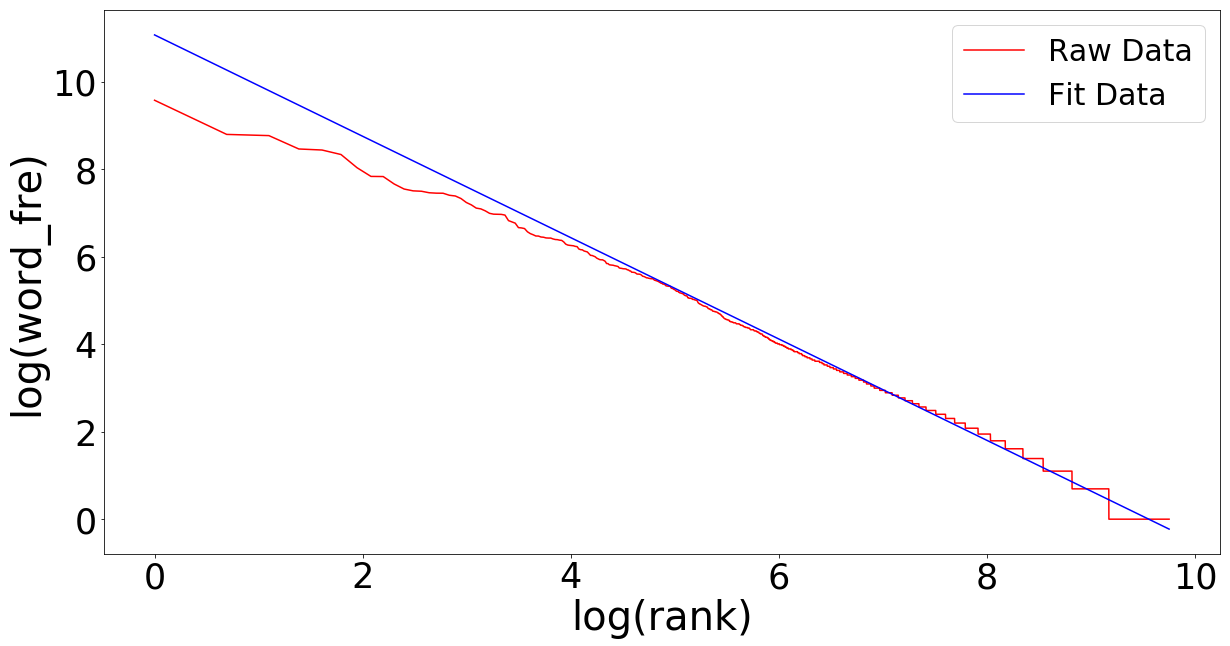

In [14]:
plt.figure(figsize=(20,10))
plt.xlabel('log(rank)', fontsize = 40)
plt.ylabel('log(word_fre)', fontsize = 40)
plt.xticks(fontsize = 35)
plt.yticks(fontsize = 35)

raw_line = mlines.Line2D([], [], color='red',
                          markersize=15, label='Raw Data')
fit_line = mlines.Line2D([], [], color='blue',
                          markersize=15, label='Fit Data')
plt.legend(handles=[raw_line, fit_line], fontsize= 30)

plt.plot(log_rank, log_word_fre, "r")
plt.plot(log_rank, fit_word_fre, 'b')

In [10]:
n = len(log_rank)

r = ( n*sum(log_rank*log_word_fre) - sum(log_rank)*sum(log_word_fre) ) / sqrt ( n*sum(log_rank*log_rank) - sum(log_rank)*sum(log_rank)) / sqrt ( n*sum(log_word_fre*log_word_fre) - sum(log_word_fre)*sum(log_word_fre) ) 
#r1 = ( n*sum(log_rank*fit_word_cnt) - sum(log_rank)*sum(fit_word_cnt) ) / sqrt ( n*sum(log_rank*log_rank) - sum(log_rank)*sum(log_rank)) / sqrt ( n*sum(fit_word_cnt*fit_word_cnt) - sum(fit_word_cnt)*sum(fit_word_cnt) ) 

In [12]:
print(r)
#print(r1)

-0.989956732502003
